# Inspect the Data
The dataset is retrieved from Kaggle, for more details [click here](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data).

In [167]:
import pandas as pd
import numpy as np

RAND_STATE_VALUE = 0

In [168]:
def load_data(path: str) -> pd.DataFrame: 
    df = pd.read_parquet(path)
    return df

def check_null(df: pd.DataFrame) -> pd.DataFrame:
    null_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns = ["null_count"])
    null_df["null_percentage"] = null_df["null_count"] / len(df)
    return null_df

In [169]:
DATA_PATH = "datasets/realtor-data.parquet"
df = load_data(DATA_PATH)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [171]:
check_null(df)

,null_count,null_percentage
prev_sold_date,459101,0.507313
house_size,292886,0.323643
acre_lot,266642,0.294643
bed,129840,0.143475
bath,113884,0.125843
zip_code,204,0.000225
city,72,0.000080
price,71,0.000078
status,0,0.000000
state,0,0.000000


In [172]:
df = df.drop(["prev_sold_date"], axis = 1)
df = df.dropna()
df = df.drop_duplicates()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51864 entries, 0 to 904938
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      51864 non-null  object 
 1   bed         51864 non-null  float64
 2   bath        51864 non-null  float64
 3   acre_lot    51864 non-null  float64
 4   city        51864 non-null  object 
 5   state       51864 non-null  object 
 6   zip_code    51864 non-null  float64
 7   house_size  51864 non-null  float64
 8   price       51864 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.0+ MB


In [174]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,179000.0


In [175]:
numeric_cols = df.select_dtypes(include = "number").columns
to_int_cols = [col for col in numeric_cols if col not in ["acre_lot", "house_size", "price"]]
categorical_cols = df.select_dtypes(include = "object").columns

df[categorical_cols] = df[categorical_cols].astype("string")
df[to_int_cols] = df[to_int_cols].astype("int64")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51864 entries, 0 to 904938
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      51864 non-null  string 
 1   bed         51864 non-null  int64  
 2   bath        51864 non-null  int64  
 3   acre_lot    51864 non-null  float64
 4   city        51864 non-null  string 
 5   state       51864 non-null  string 
 6   zip_code    51864 non-null  int64  
 7   house_size  51864 non-null  float64
 8   price       51864 non-null  float64
dtypes: float64(3), int64(3), string(3)
memory usage: 4.0 MB


In [177]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,601,920.0,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,601,1527.0,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,795,748.0,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,731,1800.0,145000.0
5,for_sale,4,3,0.46,San Sebastian,Puerto Rico,612,2520.0,179000.0


# EDA and Visualization

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

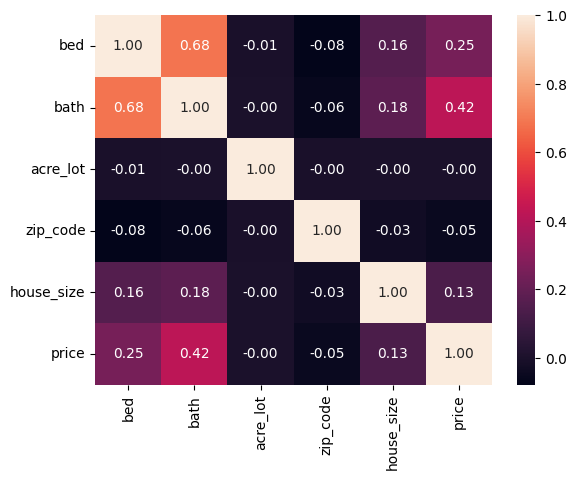

In [179]:
sns.heatmap(df[numeric_cols].corr(), annot = True, fmt = ".2f")
plt.show()

# Data Preprocessing

In [180]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [181]:
def preprocess(df: pd.DataFrame):
    numeric_cols = df.select_dtypes(include = "int64").columns
    float_cols = df.select_dtypes(include = "float64").columns
    
    num_pipe = Pipeline(
        steps = [
            ("log_transform", FunctionTransformer(np.log1p)),
            ("min_max", MinMaxScaler())   
        ]
    )
    float_pipe = Pipeline(
        steps = [
            ("log_transform", FunctionTransformer(np.log1p)),
            ("scaler", StandardScaler())
        ]
    )
    
    preprocessor = ColumnTransformer(
        transformers = [
            ("numeric", num_pipe, numeric_cols),
            ("float", float_pipe, float_cols)
        ]
    )
    
    preprocessed_data  = preprocessor.fit_transform(df)
    return preprocessed_data 

In [182]:
use_cols = [col for col in numeric_cols if col not in ["price", "zip_code"]]
X = df[use_cols]
y = df["price"]

In [183]:
X = preprocess(X)
X.shape

(51864, 4)

# Model Training

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RAND_STATE_VALUE)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2052386302696263

## Model Evaluation

In [186]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [187]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [188]:
linear_metric = pd.DataFrame({
    "metric": ["mae", "mse", "rmse", "r2"],
    "value": [mae, mse, rmse, r2]
})
linear_metric

,metric,value
0,mae,5.909561e+05
1,mse,2.364038e+12
2,rmse,1.537543e+06
3,r2,2.052386e-01
